<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module4/Projects/SalesPrediction/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**
Linear Regression assumes that the relationship between **input (X) and output (Y)** is a **straight line**.

## **Mathematical Model**

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon $$

Where:
- $ Y $ → Predicted output (dependent variable)
- $ X $ → Feature(s) (independent variable)
- $ \beta_0 $ → Intercept
- $ \beta_n $ → Coefficients (weights)
- $ \epsilon $ → Error term

---

# **Nonlinear Regression**
Nonlinear Regression is used when the relationship between **X and Y is not a straight line**. It models more complex patterns.

## **Mathematical Model**
A nonlinear equation may look like:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 e^{X} + \epsilon $$

## **Examples of Nonlinear Models**
- **Polynomial Regression**: $ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... $  
- **Exponential Growth**: $ Y = \beta_0 e^{\beta_1 X} $  
- **Logistic Growth**: $ Y = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}} $  

#Code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Review Linear Regression Implementation

In [4]:
class CustomLinearRegression:
  def __init__(self , X_data , y_target , learning_rate =0.01 , num_epochs =10000):
    self.X_data = X_data
    self.y_target = y_target
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs

    #Initial weights
    self.theta = np.random.randn(self.X_data.shape [1], 1)
    self.losses = []

  def compute_loss(self, y_pred, y_target ):
    loss = np.mean((y_pred - y_target) ** 2)
    return loss

  def predict(self, X_data):
    y_pred = X_data.dot(theta)
    return y_pred

  def fit(self):
    for epoch in range(num_epochs):
      # predict
      y_pred = self.predict(self.X_data)
      # compute loss
      loss = self.compute_loss(y_pred, self.y_target)
      # compute gradient
      loss_grad = 2*(y_pred - self.y_target)/self.num_samples
      gradient = self.X_data.T.dot(loss_grad)
      # update weights
      self.theta = self.theta - self.learning_rate * gradient
      # store loss
      self.losses.append(loss)

    return {
      'loss': sum(self.losses)/len(self.losses),
      'weight': self.theta
    }

In [5]:
def r2score (y_pred, y):
  rss = np.sum((y_pred - y)** 2)
  tss = np.sum((y - y.mean())**2)
  r2 = 1 - ( rss / tss )
  return r2

y_pred = np.array([1 , 2 , 3 , 4 , 5])
y = np.array([1 , 2 , 3 , 4 , 5])
print(r2score (y_pred , y))

y_pred = np.array([1 , 2 , 3 , 4 , 5])
y = np.array([3 , 5 , 5 , 2 , 4])
print(r2score (y_pred , y))

1.0
-2.235294117647059


##Non-linear Regression

We will try to create the polynomial features:

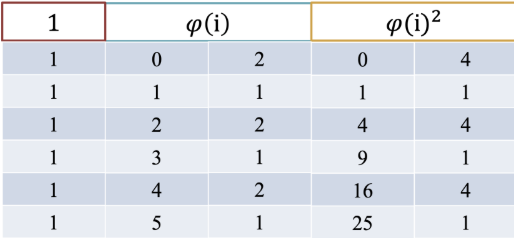

In [14]:
def create_polynomial_features (X , degree =2) :
  """ Creates the polynomial features
  Args :
    X : A array for the data .
    degree : A intege for the degree of
    the generated polynomial function .
  """
  X_mem = []
  for X_sub in X.T:
    X_sub = X_sub.T
    X_new = X_sub
    for d in range(2, degree+1):
      X_new = np.c_[X_new, np.power(X_sub, d)]
    X_mem.extend(X_new.T)
  return np.c_[ X_mem ].T

X = np.array([[1 , 2],
              [2 , 3],
              [3 , 4]])
X_poly = create_polynomial_features(X)
X_poly

array([[ 1,  1,  2,  4],
       [ 2,  4,  3,  9],
       [ 3,  9,  4, 16]])

##Sales Prediction

###Data

####Load data

In [15]:
df = pd.read_csv('./SalesPrediction.csv')

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


####Preprocessing

We can see that the Influencer Column is category, so we have to encode it

In [17]:
df = pd . get_dummies(df)
df.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False


We also fill the NaN with the mean

In [18]:
df = df.fillna (df.mean())

Now split the data

In [24]:
X = df [['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega',
         'Influencer_Micro', 'Influencer_Nano']]
y = df [['Sales']]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=0)


Scale the data

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler ()
X_train_processed = scaler.fit_transform ( X_train )
X_test_processed = scaler.transform (X_test)
scaler.mean_[0]

54.173577723283785

Make polynomial features

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform ( X_train_processed )
X_test_poly = poly_features.transform ( X_test_processed )

###Model

####Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)
r2_score(y_test , y_pred)

0.9952672000833009

####Nonlinear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
r2_score(y_test , y_pred)

0.9951771750974792